PARTIE UTILISATION D'UN MODELE

Importation et nettoyage des données


In [120]:
!pip install pandas
!pip install matplotlib
!pip install plotly
!pip install numpy
!pip install scikit-learn

In [121]:
# Import des librairies
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Import du dataframe
train = pd.read_csv('data/train.csv')

In [122]:
# Extraction titre
train['Title'] = train['Name'].str.extract(r',\s*([^\.]*)\s*\.', expand=False)
train['Title'] = train['Title'].str.strip()
# Verification des entrées concernées
train[train['Age'].isnull()].groupby(['Title', 'Pclass', 'Sex', 'Parch']).size()
# Conversion données NULL 
age_medians = train.groupby(['Title', 'Pclass'])['Age'].median()
# Fonction pour imputer/remplacer les âges manquants en fonction des catégories concernées
def impute_age(row):
    if pd.isnull(row['Age']):
        return age_medians.get((row['Title'], row['Pclass']), train['Age'].median())
    return row['Age']
# Application des changements à la table
train['Age'] = train.apply(impute_age, axis=1)



Les modèles comme KNN ne peuvent utiliser que des valeurs numériques. Il faut donc transformer les colonnes contenant du texte en chiffres.
Etape de Normalisation

In [123]:
# # Choisir les features et la valeur 'Survivant' à prédire

# print(X.dtypes)
# print("----------")
# # Crée X en convertissant les colonnes texte
# train['Sex'] = pd.get_dummies(train['Sex']) # Convertit 'Sex' en 'Sex_female', 'Sex_male', passe de type obj à type bool
# y = train['Survived']
# print(f"Données 'Sex' converties : {train['Sex'].dtypes}")
# print("----------")
# print(y.dtypes)
# features = ['Age', 'Pclass', 'Sex', 'Title']
# X = train[features]

from sklearn.preprocessing import LabelEncoder
le_sex = LabelEncoder()
le_title = LabelEncoder()
train['Sex'] = le_sex.fit_transform(train['Sex'])
train['Title'] = le_title.fit_transform(train['Title'])
features = ['Age', 'Pclass', 'Sex', 'Title']
X = train[features]
y = train['Survived']




Séparer les données (entraînement + test)

In [124]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=1)

Créer le modèle KNN

In [125]:
# on choisit comme exemple le nombre de voisin = 5
model = KNeighborsClassifier(n_neighbors=5)

Entraîner le modèle

In [126]:
model.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


Prédire sur les données de validation

In [127]:
predictions = model.predict(X_valid)


Tableau comparatif simple

In [ ]:
# Affichage de quelques prédictions vs valeurs réelles
comparison = pd.DataFrame({'Réel': y_valid, 'Prédit': predictions})
print(comparison.head(20))


     Réel  Prédit
862     1       1
223     0       0
84      1       1
680     0       1
535     1       1
623     0       0
148     0       0
3       1       1
34      0       0
241     1       1
794     0       0
2       1       1
6       0       0
17      1       0
368     1       1
430     1       0
819     0       0
743     0       0
189     0       0
437     1       1


KeyError: "None of [Index([1, 0, 1, 0, 1, 0, 0, 1, 0, 1,\n       ...\n       0, 1, 0, 0, 1, 1, 0, 1, 0, 1],\n      dtype='int64', length=223)] are in the [columns]"

Matrice de confusion 

In [129]:
# création de dataframe
import pandas as pd

# Comparaison prédiction vs vérité terrain
comparison = pd.DataFrame({
    'Réel': y_valid,
    'Prédit': predictions
})

# Marquer si la prédiction est correcte
comparison['Correct'] = comparison['Réel'] == comparison['Prédit']

In [130]:
# Barplot interactif : Prédit vs Réel (groupé)
import plotly.express as px

fig = px.histogram(comparison, x='Réel', color='Prédit', barmode='group',
                   title='Comparaison Réel vs Prédit (Titanic)', 
                   labels={'Réel': 'Valeur réelle', 'Prédit': 'Valeur prédite'})
fig.update_layout(bargap=0.2)
fig.show()

In [131]:
# Visualisation des erreurs (correct ou pas)
fig = px.histogram(comparison, x='Prédit', color='Correct', barmode='group',
                   title='Nombre de prédictions correctes vs incorrectes',
                   labels={'Correct': 'Prédiction correcte ?'})
fig.update_layout(bargap=0.2)
fig.show()

In [132]:
# Ajout d'une feature pour comprendre les erreurs
# Si tu as X_valid avec Age et Sex (get_dummies OK)
X_visu = X_valid.copy()
X_visu['Réel'] = y_valid
X_visu['Prédit'] = predictions
X_visu['Correct'] = X_visu['Réel'] == X_visu['Prédit']

fig = px.scatter(X_visu, x='Age', y='Pclass', color='Correct',
                 hover_data=['Réel', 'Prédit'],
                 title="Erreurs de prédictions selon Age et Pclass")
fig.show()


Évaluer la performance

In [133]:
accuracy = accuracy_score(y_valid, predictions)
print(f"Précision :, {accuracy}")

Précision :, 0.7443946188340808


Déterminer le meilleur k

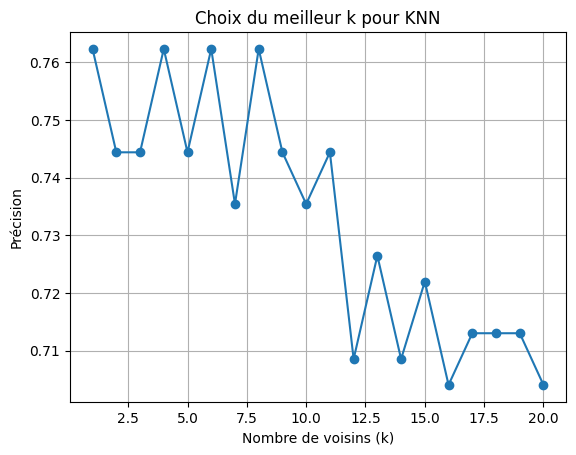

✔️ Meilleur k = 1 avec une précision de 0.762


In [134]:
# Plage de k à tester
k_values = range(1, 21)
accuracies = []

# Boucle sur chaque k
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    acc = accuracy_score(y_valid, preds)
    accuracies.append(acc)

# Affichage
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("Nombre de voisins (k)")
plt.ylabel("Précision")
plt.title("Choix du meilleur k pour KNN")
plt.grid(True)
plt.show()

# Meilleur k
best_k = k_values[accuracies.index(max(accuracies))]
print(f"✔️ Meilleur k = {best_k} avec une précision de {max(accuracies):.3f}")

In [135]:
!pip install seaborn

In [136]:
!pip install nbformat


In [137]:

df_corr = X.copy()
df_corr['Survived'] = train['Survived']

# Calcul de la matrice de corrélation
corr_matrix = df_corr.corr()

# Conversion en DataFrame longue pour Plotly
corr_long = corr_matrix.reset_index().melt(id_vars='index')
corr_long.columns = ['Feature1', 'Feature2', 'Correlation']

# Heatmap interactive avec plotly
fig = px.imshow(
    corr_matrix.values,
    x=corr_matrix.columns,
    y=corr_matrix.index,
    color_continuous_scale='RdBu_r',
    zmin=-1, zmax=1,
    text_auto='.2f',
    title='Corrélations entre features et Survived (interactive)'
)
fig.update_layout(width=700, height=600)
fig.show()


In [138]:
# Construire un DataFrame pour la visualisation
X_visu = X_valid.copy()

# Ajout des colonnes nécessaires
X_visu['Sex'] = train.loc[X_valid.index, 'Sex']
X_visu['Age'] = train.loc[X_valid.index, 'Age']
X_visu['Pclass'] = train.loc[X_valid.index, 'Pclass']
X_visu['Title'] = train.loc[X_valid.index, 'Title']
X_visu['Réel'] = y_valid
X_visu['Prédit'] = model.predict(X_valid)
X_visu['Correct'] = X_visu['Réel'] == X_visu['Prédit']


In [139]:
# Reconvertir 'Sex' et 'Title' si nécessaire pour meilleure lisibilité
X_visu['Sex'] = le_sex.inverse_transform(X_visu['Sex'])
X_visu['Title'] = le_title.inverse_transform(X_visu['Title'])

fig = px.scatter(
    X_visu,
    x='Age',
    y='Pclass',
    color='Sex',
    symbol='Correct',
    animation_frame='Title',
    hover_data=['Réel', 'Prédit', 'Correct'],
    title="Animation des prédictions selon l'âge, la classe et le titre",
    labels={'Pclass': 'Classe', 'Age': 'Âge'}
)

fig.update_layout(
    yaxis=dict(autorange='reversed'),  # Inverser l’axe des classes
    legend_title='Sexe',
    height=600
)

fig.show()
